# Score Distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)

In [3]:
# Load scores
df = pd.read_csv('scores.csv')

## Descriptive Statistics

In [4]:
# Summary statistics
print("Summary Statistics:")
df[['k6_score', 'srs2_score']].describe()

Summary Statistics:


,k6_score,srs2_score
count,42.000000,42.00000
mean,5.047619,63.02381
std,3.574656,24.76375
min,0.000000,9.00000
25%,2.000000,47.00000
50%,5.000000,62.50000
75%,7.750000,82.00000
max,15.000000,116.00000


## K6 Score Distribution

K6 scores range from 0-24. Higher scores indicate greater psychological distress.
- 0-4: Low distress
- 5-12: Moderate distress
- 13-24: Severe distress

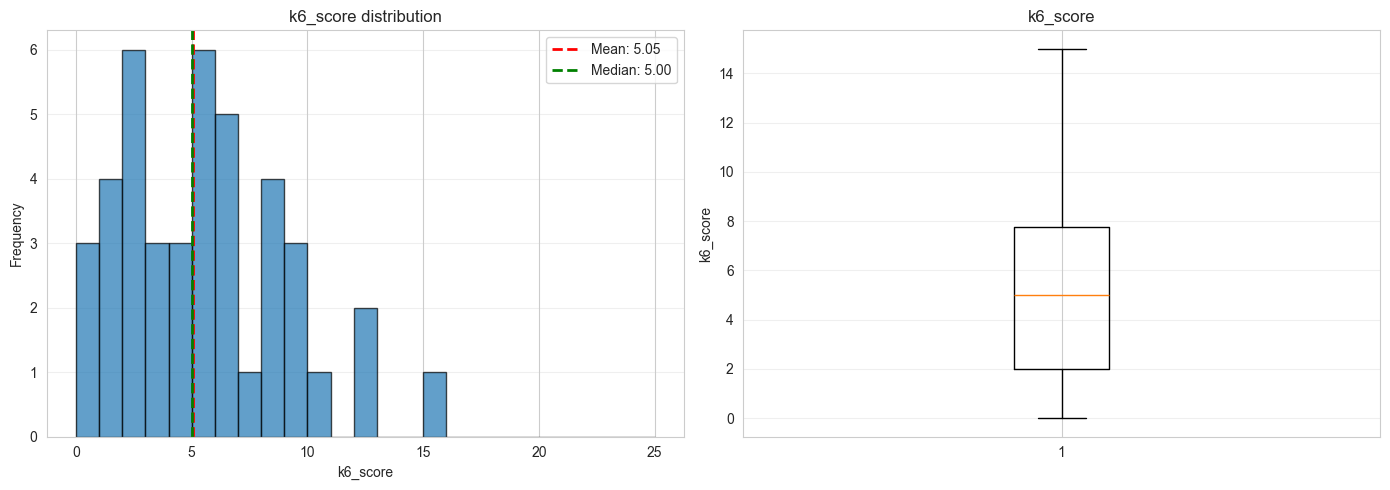


K6 Score Categories:
Low distress (0-4): 19 (45.2%)
Moderate distress (5-12): 22 (52.4%)
Severe distress (13-24): 1 (2.4%)


In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['k6_score'], bins=range(0, 26), edgecolor='black', alpha=0.7)
axes[0].axvline(df['k6_score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["k6_score"].mean():.2f}')
axes[0].axvline(df['k6_score'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["k6_score"].median():.2f}')
axes[0].set_xlabel('k6_score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('k6_score distribution')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Box plot
axes[1].boxplot(df['k6_score'], vert=True)
axes[1].set_ylabel('k6_score')
axes[1].set_title('k6_score')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# K6 categories
print("\nK6 Score Categories:")
low_distress = len(df[df['k6_score'] <= 4])
moderate_distress = len(df[(df['k6_score'] >= 5) & (df['k6_score'] <= 12)])
severe_distress = len(df[df['k6_score'] >= 13])

print(f"Low distress (0-4): {low_distress} ({low_distress/len(df)*100:.1f}%)")
print(f"Moderate distress (5-12): {moderate_distress} ({moderate_distress/len(df)*100:.1f}%)")
print(f"Severe distress (13-24): {severe_distress} ({severe_distress/len(df)*100:.1f}%)")

## SRS-2 Score Distribution

SRS-2 scores range from 0-195. Higher scores indicate greater severity of autism spectrum symptoms.

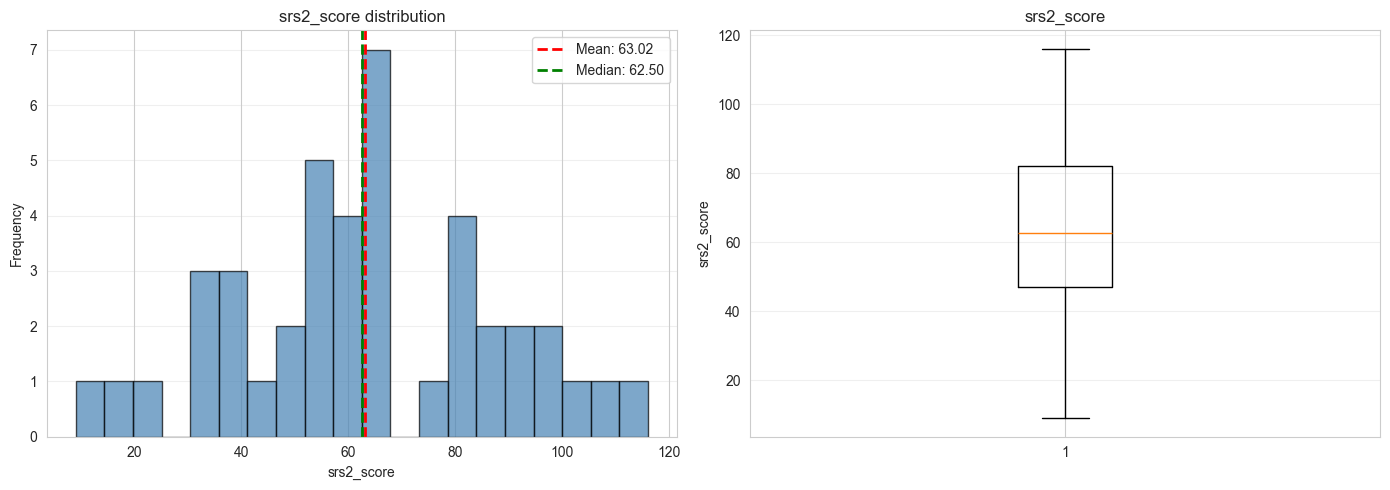

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['srs2_score'], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(df['srs2_score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["srs2_score"].mean():.2f}')
axes[0].axvline(df['srs2_score'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["srs2_score"].median():.2f}')
axes[0].set_xlabel('srs2_score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('srs2_score distribution')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Box plot
axes[1].boxplot(df['srs2_score'], vert=True)
axes[1].set_ylabel('srs2_score')
axes[1].set_title('srs2_score')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Correlation Analysis

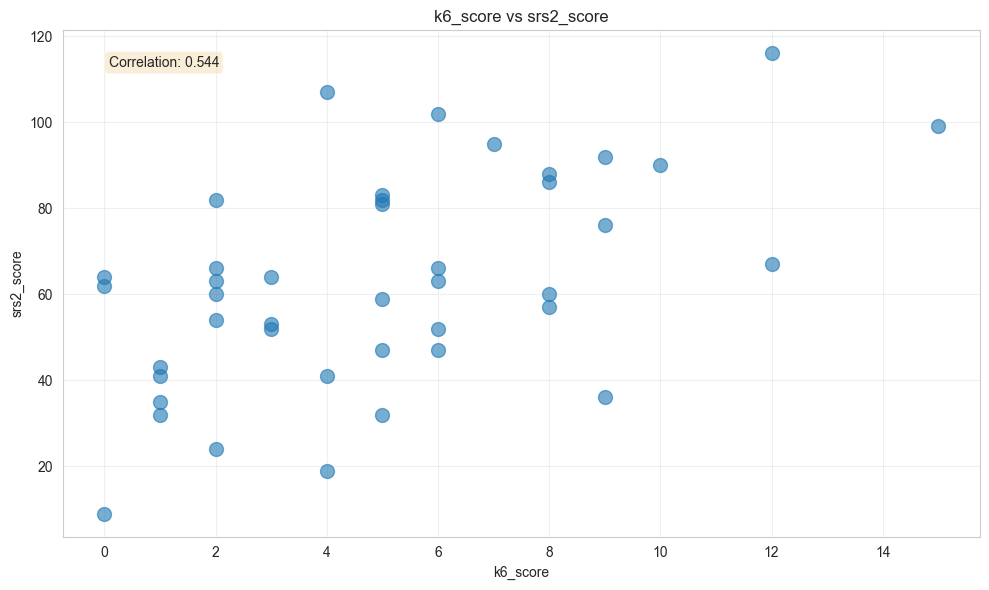


Pearson correlation coefficient: 0.544


In [7]:
# Scatter plot of K6 vs SRS-2
plt.figure(figsize=(10, 6))
plt.scatter(df['k6_score'], df['srs2_score'], alpha=0.6, s=100)
plt.xlabel('k6_score')
plt.ylabel('srs2_score')
plt.title('k6_score vs srs2_score')
plt.grid(alpha=0.3)

# Add correlation
correlation = df['k6_score'].corr(df['srs2_score'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         verticalalignment='top')

plt.tight_layout()
plt.show()

print(f"\nPearson correlation coefficient: {correlation:.3f}")

## Combined Distribution

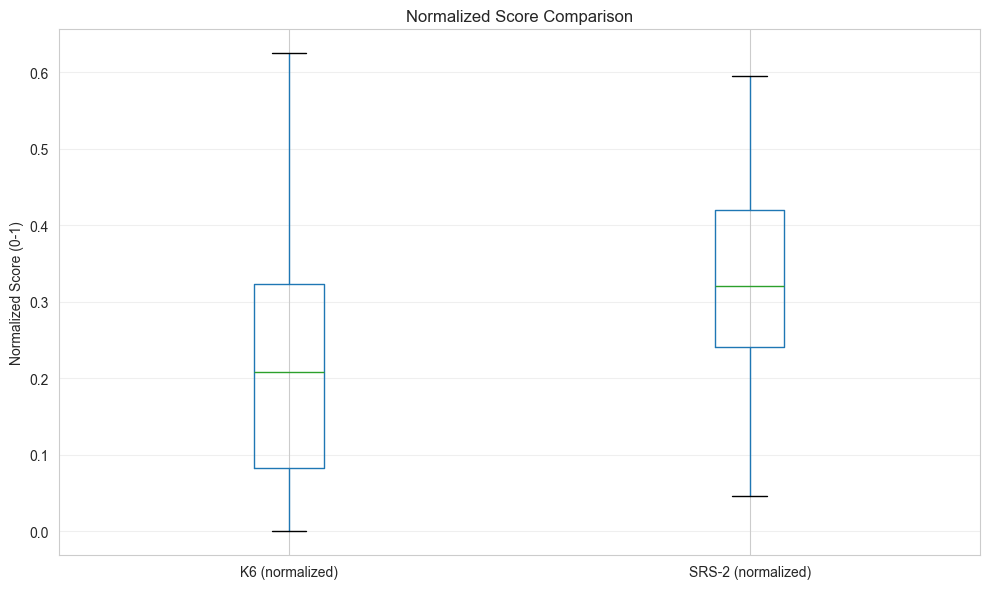

In [8]:
# Side-by-side violin plots
fig, ax = plt.subplots(figsize=(10, 6))

# Normalize scores to 0-1 scale for comparison
df_normalized = pd.DataFrame({
    'K6 (normalized)': df['k6_score'] / 24,
    'SRS-2 (normalized)': df['srs2_score'] / 195
})

df_normalized.boxplot(ax=ax)
ax.set_ylabel('Normalized Score (0-1)')
ax.set_title('Normalized Score Comparison')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()